# Basic file manipulation and data loading
We start with the well-known zip code example. The data can be downloaded from the website of [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/data.html). Extract the file and then give the file address to read the text "zip.train" file.

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

zipdata=np.loadtxt("../data/zip.train")

On Trevor Hastie's website, we can read that the zip code dataset is about "normalized handwritten digits, automatically scanned from envelopes by the U.S. Postal Service. The original scanned digits are binary and of different sizes and orientations. The images here have been deslanted and size normalized, resulting
in 16 x 16 grayscale images (Le Cun et al., 1990)." The data contains $7291\times 257$ digit samples, first column is the sorted digit and the remaining 256 is a $16 \times 16$ grayscale image.

In [201]:
print zipdata[:,0]

[ 6.  5.  4. ...,  3.  0.  1.]


Now we plot the first row of the data with the [imshow](https://matplotlib.org/users/image_tutorial.html) function of pyplot librairy. In order to modify the plot remember the pyplot help [here](http://matplotlib.org/api/pyplot_api.html).

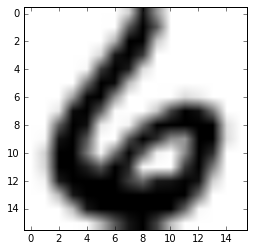

In [31]:
#We reverse grayscale with the negation symbol - 
plt.imshow(-zipdata[0,1:].reshape(16,16),"gray")

Now we create 2 datasets : one for the digit 3 and another for the digit 8. 


In [39]:
zipdata3=zipdata[zipdata[:,0]==3]
print "The number of observations corresponding to the digit 3 is" 
print len(zipdata3[:,0])

zipdata8=zipdata[zipdata[:,0]==8]
print "The number of observations corresponding to the digit 8 is" 
print len(zipdata8[:,0])

The number of observations corresponding to the digit 3 is
658
The number of observations corresponding to the digit 8 is
542


Then we select 10 random samples of the 3 digit dataset with the [random.choice](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function of numpy. Don't forget the [seed](http://www.tutorialspoint.com/python/number_seed.htm) if you want to replicate your results!


In [41]:
np.random.seed(1)
random3=np.random.choice(range(len(zipdata3)),size=10,replace=False)              

And we finaly plot them.

(-0.5, 159.5, 15.5, -0.5)

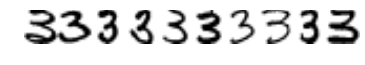

In [68]:
zipdata3stack=zipdata3[random3[0],1:].reshape(16,16)

for i in range(1,len(random3)):
    zipdata3stack=np.hstack((zipdata3stack, zipdata3[random3[i],1:].reshape(16,16)))

plt.imshow(-zipdata3stack,"gray")
plt.axis("off")

### Exercises
a) Plot the 3 digits without loop and vertically.

(-0.5, 15.5, 159.5, -0.5)

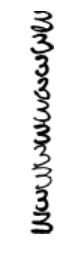

In [78]:
plt.imshow(-zipdata3[random3,1:].reshape(160,16),"gray")
plt.axis("off")

b) Select 10 random samples of the 8 digit dataset and plot them horizontally.

(-0.5, 159.5, 15.5, -0.5)

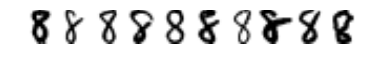

In [77]:
random8=np.random.choice(range(len(zipdata8)),size=10,replace=False)              

zipdata8stack=zipdata8[random8[0],1:].reshape(16,16)

for i in range(1,len(random8)):
    zipdata8stack=np.hstack((zipdata8stack,zipdata8[random8[i],1:].reshape(16,16)))

plt.imshow(-zipdata8stack,"gray")
plt.axis("off")

c) Then overlap the 3 digit sample over the 8 digit sample (with the [vstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html) function).

(-0.5, 159.5, 31.5, -0.5)

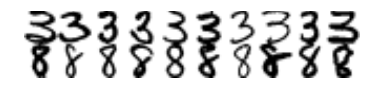

In [87]:
plt.imshow(-np.vstack((zipdata3stack,zipdata8stack)),"gray")
plt.axis("off")

# Principal components projection
We compare two different dimension reduction techniques on all 10 digits data: the principal components and linear discriminant axes.


In [91]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

x=zipdata[:,1:]
y=zipdata[:,0]

The  [principal components projection](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is an unsupervised technique who apply a linear (and orthogonal) transformation on the independant variables $x$. This transformation, based on variables' covariance, projects the data to a lower dimensional space equal to the number of components. 

In [142]:
pca=PCA(n_components=2)
zipdata_pca=pca.fit(x).transform(x)

When possible, we can explicitly observe the data reduction.

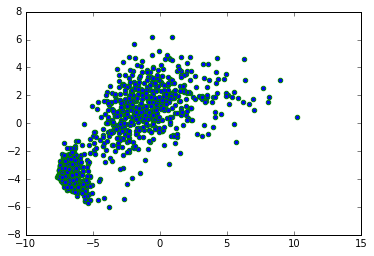

In [146]:
index=(zipdata[:,0]==1) | (zipdata[:,0]==8)
plt.scatter(zipdata_pca[index,0],zipdata_pca[index,1],edgecolor="g")

### Question

Can you separate (and identify) each digits' class?


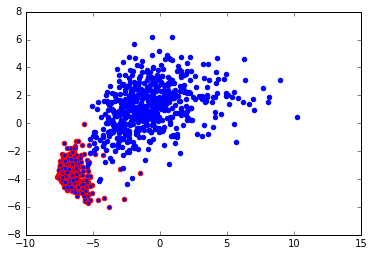

In [138]:
plt.scatter(zipdata_pca[y==1,0],zipdata_pca[y==1,1],edgecolor="r")
plt.scatter(zipdata_pca[y==8,0],zipdata_pca[y==8,1],edgecolor="b")

### Question
What would you observe if the digits studied were 3 and 8? 1 and 3?

# Linear discriminant projection
The [linear discriminant projection](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) finds a linear combination of the attributes so that they are the most separable possible. It can be shown that the principal component projection is a special case of the linear discriminant projection. For the linear discriminant you require a classification vector. The number of projections in linear discriminant is maximum the number of class -1.



In [169]:
lda=LDA(n_components=3)
zipdata_lda=lda.fit(x,y).transform(x)

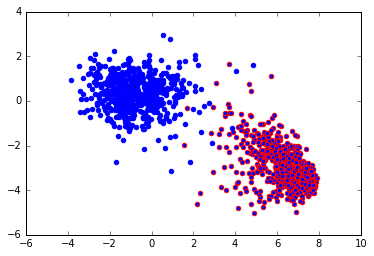

In [170]:
plt.scatter(zipdata_lda[y==1,0],zipdata_lda[y==1,1],edgecolor="r")
plt.scatter(zipdata_lda[y==8,0],zipdata_lda[y==8,1],edgecolor="b")

## 3D scatter plot
Now lets try 3D plots. In order to see the plot in a new window and rotate the plot using your trackpad or mouse, run "3dscatterplot.ipynb" file.

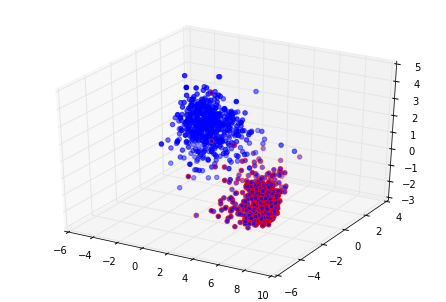

In [171]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()

ax=Axes3D(fig)
ax.scatter(zipdata_lda[y==1,0],zipdata_lda[y==1,1],zipdata_lda[y==1,2],edgecolor="r")
ax.scatter(zipdata_lda[y==8,0],zipdata_lda[y==8,1],zipdata_lda[y==8,2],edgecolor="b")

### Exercises
a) Create a subset of data only including digits 2 and 5.

In [198]:
a,b =2,5

index=(zipdata[:,0]==a) | (zipdata[:,0]==b)
x_ab=zipdata_lda[index,:]
y_ab=zipdata[index,0]

b) Run the binary support vector machines of chapter 3 on the subset of the zip data for only digits 2 and 5.

In [196]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_ab, y_ab)
y_ab_hat=clf.predict(x_ab)

c) Calculate the classification accuracy for each digits's using a [confusion matix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html).

In [197]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_ab,y_ab_hat)/float(len(y_ab))

array([[ 0.64835165,  0.00129282],
       [ 0.00129282,  0.3490627 ]])

In [ ]:
a, b = 2,3

In [ ]:
print a